In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
read = pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/pesticides.csv")
read.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [6]:
read_r= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/rainfall.csv")
read_r.sample(10)

,Area,Year,average_rain_fall_mm_per_year
3946,Mauritius,1995,2041
1447,Costa Rica,2008,2926
5482,Somalia,2013,282
1867,Equatorial Guinea,1993,2156
1011,Cabo Verde,2006,228
1639,Czech Republic,2014,677
5326,Singapore,2012,2497
4801,Peru,2014,1738
4869,Portugal,1987,854
5352,Sint Maarten (Dutch part),2007,NaN


In [7]:
read_yield= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/yield.csv")
read_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [8]:
yield_read= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/yield_df.csv")
yield_read.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
read_t= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/temp.csv")
read_t.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [10]:
# Data cleaning and preprocessing

#finding null values
print(yield_read.isnull().sum()) #rainfall has many errors on the average rainfall column


Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [11]:
yield_read.info()
yield_read.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


### Part 1: EDA(exploratory Data analysis)

In [12]:
#### We are renaming the Columns
#Unnamed: 0	Area	Item	Year	hg/ha_yield	average_rain_fall_mm_per_year	pesticides_tonnes	avg_temp
yield_read = yield_read.rename(columns={
    'hg/ha_yield': 'Yield_hg_per_ha',
    'Area': 'Area',
    'Item': 'Item',
    'Year': 'Year',
    'average_rain_fall_mm_per_year': 'Rainfall_mm',
    'pesticides_tonnes': 'Pesticides_tonnes',
    'avg_temp': 'Temperature_C'
})


In [13]:
yield_read[['Yield_hg_per_ha', 'Rainfall_mm', 'Pesticides_tonnes', 'Temperature_C']].describe()


,Yield_hg_per_ha,Rainfall_mm,Pesticides_tonnes,Temperature_C
count,28242.000000,28242.00000,28242.000000,28242.000000
mean,77053.332094,1149.05598,37076.909344,20.542627
std,84956.612897,709.81215,59958.784665,6.312051
min,50.000000,51.00000,0.040000,1.300000
25%,19919.250000,593.00000,1702.000000,16.702500
50%,38295.000000,1083.00000,17529.440000,21.510000
75%,104676.750000,1668.00000,48687.880000,26.000000
max,501412.000000,3240.00000,367778.000000,30.650000


### lets move to the : Visualization of elts we have

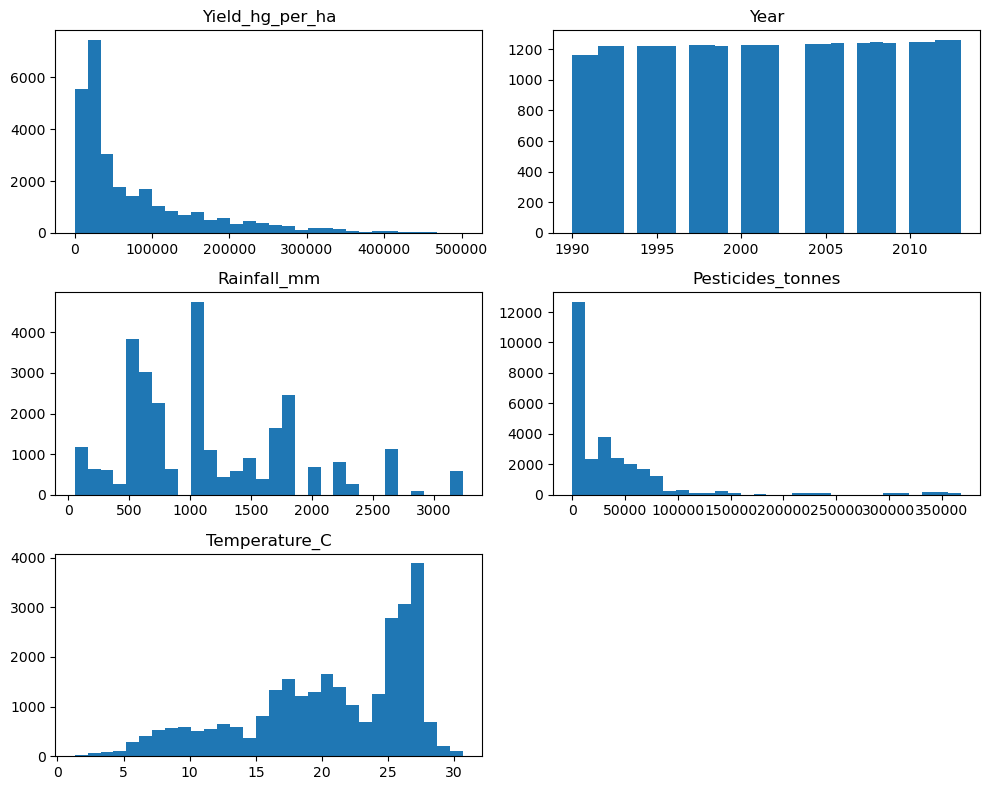

In [14]:
features = ['Yield_hg_per_ha','Area', 'Year', 'Item', 'Rainfall_mm', 'Pesticides_tonnes', 'Temperature_C']

yield_read[features].hist(figsize=(10, 8), bins=30, grid=False)
plt.tight_layout()
plt.show()


### The correlation...

* Please note that *Area and Items* are only text not Numeric, that means we are going to be challenged *

C:\Users\USER\AppData\Local\Temp\ipykernel_19728\4017354679.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Yield_hg_per_ha', data=yield_read, ci=None)


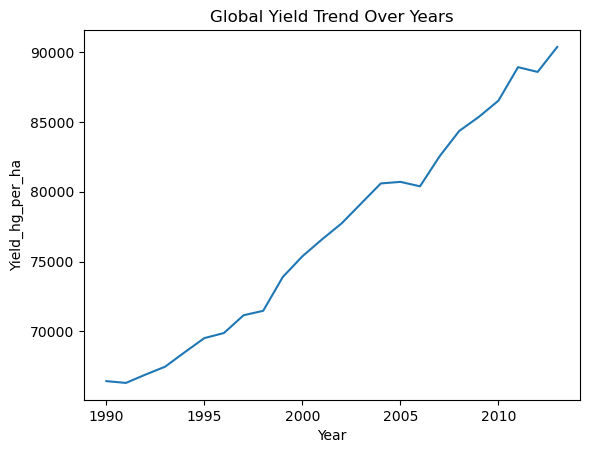

In [15]:
import seaborn as sns
sns.lineplot(x='Year', y='Yield_hg_per_ha', data=yield_read, ci=None)
plt.title("Global Yield Trend Over Years")
plt.show()


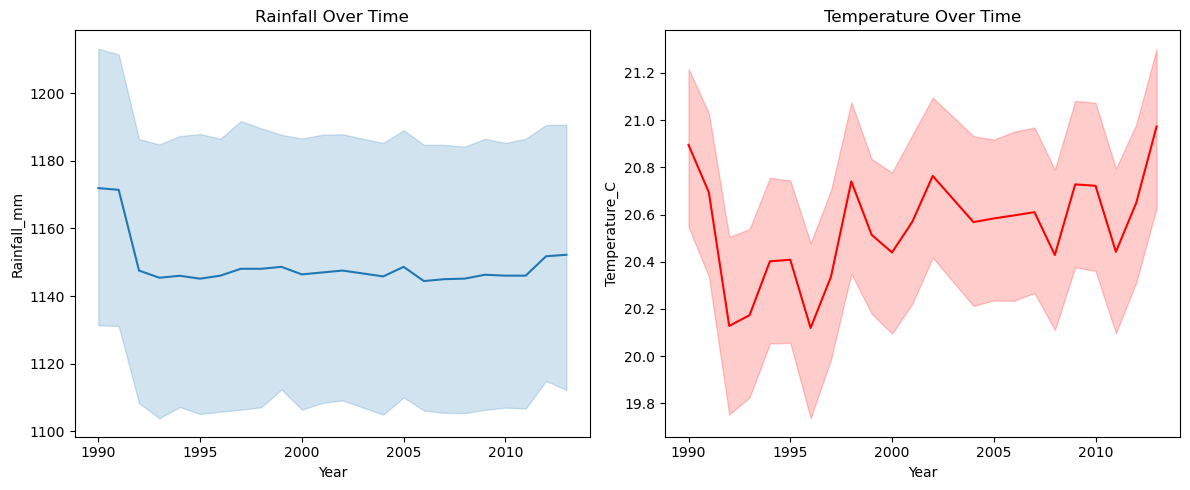

In [18]:
# Create the figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plot Rainfall
sns.lineplot(x='Year', y='Rainfall_mm', data=yield_read, ax=ax1)
ax1.set_title("Rainfall Over Time")

# Plot Temperature
sns.lineplot(x='Year', y='Temperature_C', data=yield_read, ax=ax2, color='r')
ax2.set_title("Temperature Over Time")

plt.tight_layout()
plt.show()


<Figure size 1300x1100 with 0 Axes>

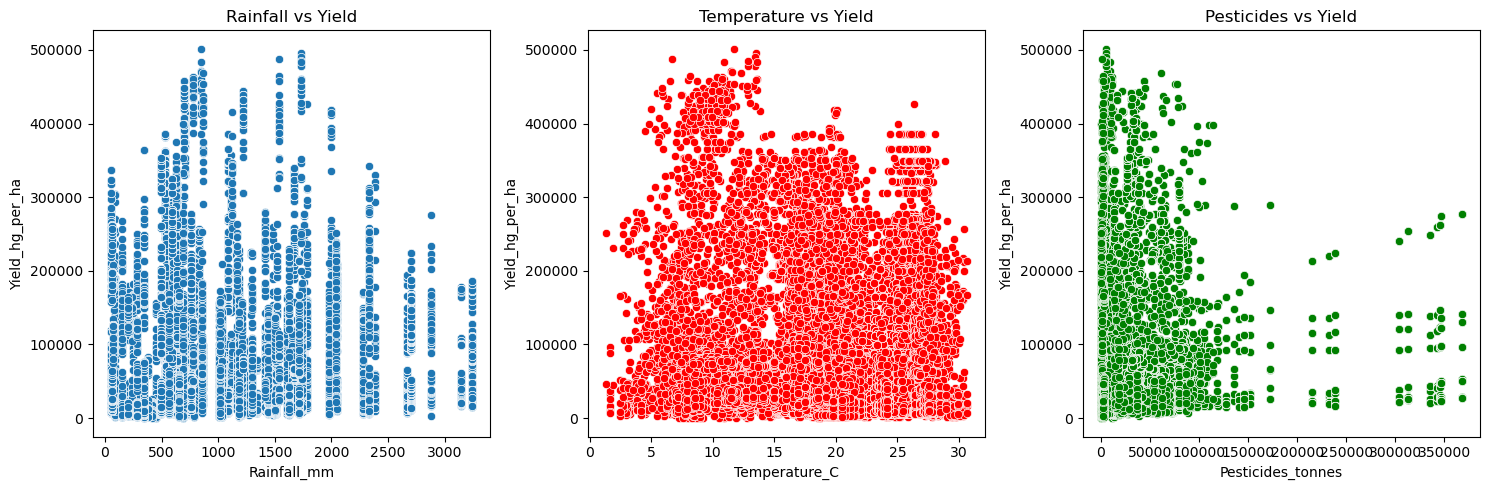

In [22]:
# checking for NOn-linear plots
plt.figure(figsize=(13, 11))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x='Rainfall_mm', y='Yield_hg_per_ha', data=yield_read, ax=ax[0])
sns.scatterplot(x='Temperature_C', y='Yield_hg_per_ha', data=yield_read, ax=ax[1], color='r')
sns.scatterplot(x='Pesticides_tonnes', y='Yield_hg_per_ha', data=yield_read, ax=ax[2], color='g')

ax[0].set_title("Rainfall vs Yield")
ax[1].set_title("Temperature vs Yield")
ax[2].set_title("Pesticides vs Yield")
plt.tight_layout()
plt.show()



- Country level Insights

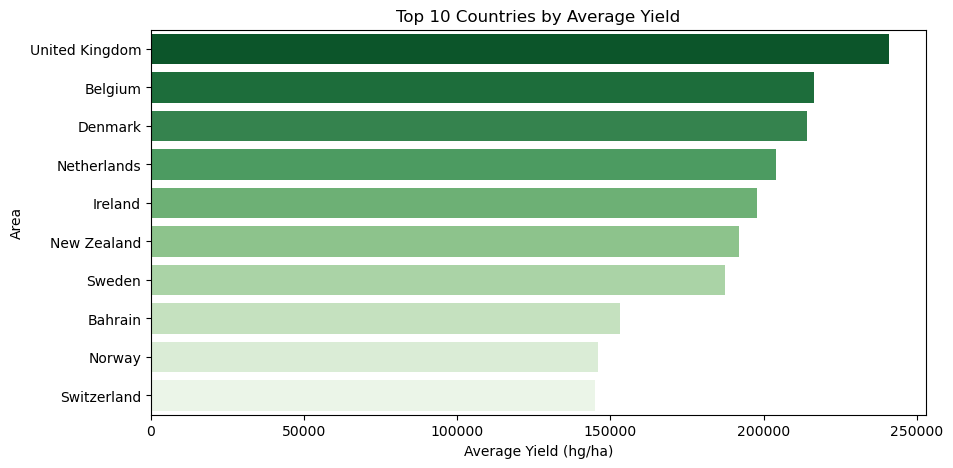

In [25]:
# Average yield by country
country_yield = yield_read.groupby('Area')['Yield_hg_per_ha'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_yield.values, y=country_yield.index, palette='Greens_r')
plt.title("Top 10 Countries by Average Yield")
plt.xlabel("Average Yield (hg/ha)")
plt.show()


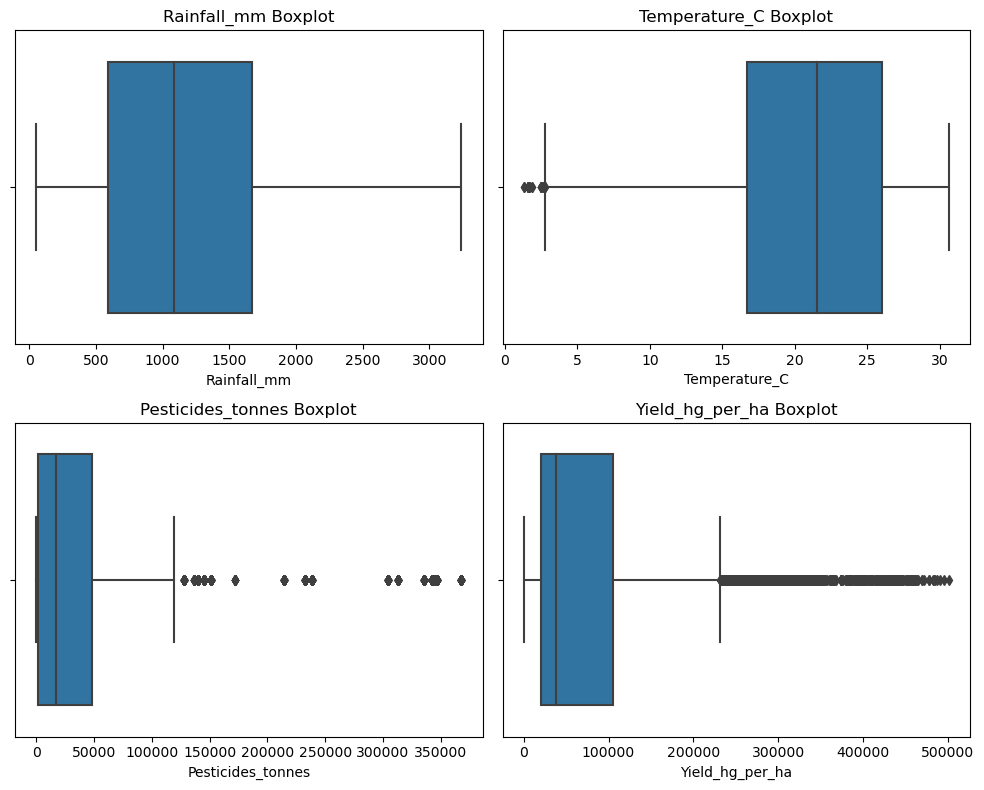

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Pre-create all subplots

columns = ['Rainfall_mm', 'Temperature_C', 'Pesticides_tonnes', 'Yield_hg_per_ha']

for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(x=yield_read[col], ax=ax)
    ax.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

#### You might notice curves or thresholds, things correlation can’t capture

## Part 2: Data Processing and Feature Engineering

In [29]:
#
yield_read.isnull().sum()

Unnamed: 0           0
Area                 0
Item                 0
Year                 0
Yield_hg_per_ha      0
Rainfall_mm          0
Pesticides_tonnes    0
Temperature_C        0
dtype: int64

In [30]:
yield_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         28242 non-null  int64  
 1   Area               28242 non-null  object 
 2   Item               28242 non-null  object 
 3   Year               28242 non-null  int64  
 4   Yield_hg_per_ha    28242 non-null  int64  
 5   Rainfall_mm        28242 non-null  float64
 6   Pesticides_tonnes  28242 non-null  float64
 7   Temperature_C      28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


*Removing Outliers then..*

In [33]:
def cap_outliers(yield_read, col):
    Q1 = yield_read[col].quantile(0.25)
    Q3 = yield_read[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    yield_read[col] = yield_read[col].clip(lower, upper)
    return yield_read

# Example: Cap outliers in Yield_hg_per_ha
yield_read = cap_outliers(yield_read, 'Yield_hg_per_ha')


In [35]:
def remove_outliers_iqr(yield_read, col):
    Q1 = yield_read[col].quantile(0.25)
    Q3 = yield_read[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return yield_read[(yield_read[col] >= lower) & (yield_read[col] <= upper)]

# Example: Remove outliers from Pesticides_tonnes
yield_read_clean = remove_outliers_iqr(yield_read, 'Pesticides_tonnes')
